**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**Import Dataset**

In [ ]:
# Load the dataset
stock = pd.read_csv('/content/CIPLA.csv')

**Data Preprocessing**

In [ ]:
stock = stock.drop(['Symbol', 'Series', 'Prev Close', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

In [ ]:
# Data preprocessing
window_size = 50
X = []
Y = []

for i in range(len(stock) - window_size - 1):
    first = stock.iloc[i, 5]
    temp = [(stock.iloc[i + j, 5] - first) / first for j in range(window_size)]
    temp2 = [(stock.iloc[i + window_size, 5] - first) / first]
    X.append(temp)
    Y.append(temp2)

**Train-test split**

In [ ]:
# Train-test split
train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=False)
len_t = len(train_X)

**Convert to numpy arrays**

In [ ]:
# Convert to numpy arrays
train_X = np.array(train_X).reshape(len(train_X), 50, 1)
test_X = np.array(test_X).reshape(len(test_X), 50, 1)
train_label = np.array(train_label)
test_label = np.array(test_label)

**Model Building**

In [ ]:
# Model building
model = Sequential()
model.add(GRU(200, input_shape=(window_size, 1), return_sequences=True))
model.add(GRU(200))  # Optionally, add another GRU layer
model.add(Dense(1, activation='linear'))

# model summary
model.summary()

**Compile the model**

In [ ]:
# Compile the model
model.compile(optimizer='RMSprop', loss='mse')

**Defining the EarlyStopping callback**

In [ ]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

**Model Training and Evaluation**

In [ ]:
# Model training
model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=20, batch_size=64, shuffle=False, callbacks=[early_stopping])

# Model evaluation
loss = model.evaluate(test_X, test_label)
print("Test Loss:", loss)

Epoch 1/20
75/75 [==============================] - 24s 267ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 2/20
75/75 [==============================] - 20s 269ms/step - loss: 0.0022 - val_loss: 9.0148e-04
Epoch 3/20
75/75 [==============================] - 21s 284ms/step - loss: 0.0018 - val_loss: 7.8181e-04
Epoch 4/20
75/75 [==============================] - 19s 259ms/step - loss: 0.0016 - val_loss: 7.0717e-04
Epoch 5/20
75/75 [==============================] - 21s 286ms/step - loss: 0.0014 - val_loss: 6.6125e-04
Epoch 6/20
75/75 [==============================] - 22s 289ms/step - loss: 0.0013 - val_loss: 6.3481e-04
Epoch 7/20
75/75 [==============================] - 19s 257ms/step - loss: 0.0013 - val_loss: 6.1825e-04
Epoch 8/20
75/75 [==============================] - 20s 273ms/step - loss: 0.0012 - val_loss: 6.0332e-04
Epoch 9/20
75/75 [==============================] - 19s 255ms/step - loss: 0.0012 - val_loss: 5.9219e-04
Epoch 10/20
75/75 [==============================] - 20s 26

**Plotting**

In [ ]:
predicted = model.predict(test_X)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)
test_label = np.array(test_label[:, 0]).reshape(-1, 1)

for j in range(len_t, len_t + len(test_X)):
    temp = stock.iloc[j, 4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

38/38 [==============================] - 5s 104ms/step


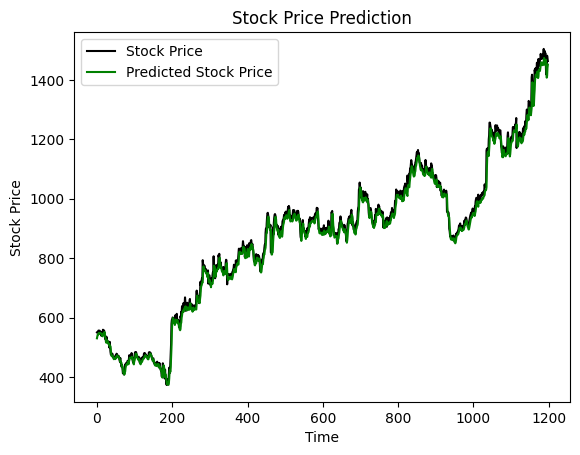

In [ ]:
# Plotting
plt.plot(test_label, color = 'red', label = ' Stock Price')
plt.plot(predicted, color = 'cyan', label = 'Predicted  Stock Price', linestyle='dashed', linewidth=2)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()


**Metrics**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(test_label, predicted)
print("Mean Squared Error (MSE):", mse)
# Calculate MAE
mae = mean_absolute_error(test_label, predicted)
print("Mean Absolute Error (MAE):", mae)
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Calculate MAPE
mape = mean_absolute_percentage_error(test_label, predicted)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 409.5689845150773
Mean Absolute Error (MAE): 15.332968953450026
Root Mean Squared Error (RMSE): 20.237810763891368
Mean Absolute Percentage Error (MAPE): 1.7574782333938517
